In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import umap
import matplotlib.pyplot as plt
import hdbscan

# Prepare Track Data

In [4]:
tracks_df = pd.read_csv("data/beyms_more_specific_tracks.csv", index_col="track_id")
tracks_df.head()

,genres
track_id,
4868,"['soul', 'jazz', 'singersongwriter', 'neosoul'..."
2900,"['electronica', 'shoegaze', 'triphop', 'lofi',..."
572665,"['soul', 'singersongwriter', 'blues', 'drama']"
2897,"['lounge', 'downtempo', 'newwave', 'postpunk',..."
15100,"['singersongwriter', 'indiefolk', 'bluegrass',..."


In [19]:
acoustic_features_df = pd.read_csv("data/acoustic_features_lfm_id.tsv", sep="\t", index_col="track_id")
acoustic_features_df = acoustic_features_df[["danceability", "energy", "speechiness", "acousticness", "instrumentalness", "tempo", "valence", "liveness"]]
acoustic_features_df = pd.DataFrame(index=acoustic_features_df.index, columns=acoustic_features_df.columns, data=MinMaxScaler().fit_transform(acoustic_features_df))
acoustic_features_df = acoustic_features_df.loc[tracks_df.index]
acoustic_features_df.head()

C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,danceability,energy,speechiness,acousticness,instrumentalness,tempo,valence,liveness
track_id,,,,,,,,
4868,0.730731,0.769997,0.008760,0.138554,0.000000,0.419792,0.521995,0.045372
2900,0.607608,0.788997,0.006649,0.461847,0.907000,0.401404,0.157992,0.126235
572665,0.603604,0.669996,0.003588,0.004096,0.000002,0.431980,0.450995,0.110203
2897,0.863864,0.473993,0.052454,0.752008,0.183000,0.496152,0.674997,0.145273
15100,0.517518,0.491993,0.006016,0.027610,0.000032,0.554316,0.445994,0.085453


# Dimensionality Reduction with UMAP

In [20]:
latent_dimensions_df = pd.DataFrame(index=acoustic_features_df.index, data=umap.UMAP().fit_transform(acoustic_features_df))
latent_dimensions_df.head()

,0,1
track_id,,
4868,-3.597707,-1.838893
2900,6.795999,0.026967
572665,-2.488623,-1.018518
2897,-0.816846,-6.183638
15100,-1.207111,-1.374607


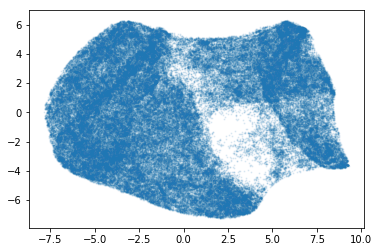

In [52]:
plt.scatter(latent_dimensions_df[0], latent_dimensions_df[1], alpha=0.1, s=1)

# Clustering with HDBSCAN

In [50]:
def visualize_clustering(data, model):
    n_clusters = len(set(model.labels_))
    predictions = model.labels_
    
    plt.figure(frameon=False)
    for c in set(model.labels_):
        if c != -1:
            cluster = data[predictions == c]
            xs = cluster[cluster.columns[0]]
            ys = cluster[cluster.columns[1]]
            plt.scatter(xs, ys, alpha=0.7, edgecolors="None", s=20, label=r"$C_" + str(c+1) + "$")
    plt.legend()
    plt.show()
    

In [ ]:
for k in range(1000, 1500, 25):
    model = hdbscan.HDBSCAN(min_cluster_size=k)
    predictions = model.fit_predict(latent_dimensions_df)
    print("k: %d, n clusters: %d" % (k, len(set(predictions))-1))

k: 1000, n clusters: 3
k: 1025, n clusters: 3
k: 1050, n clusters: 3


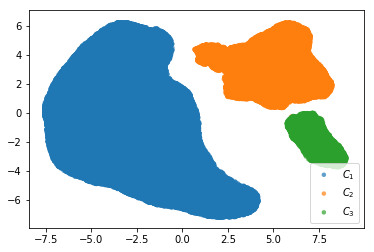

In [56]:
visualize_clustering(latent_dimensions_df, model)